In [79]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table,join
from astropy.io import fits

from astropy.visualization import astropy_mpl_style

plt.style.use(astropy_mpl_style)

In [163]:
Gaudin2023_M67 = Table.read('J_A+A_672_A159_tablec4.fits')
Gaudin2023_R147 = Table.read('J_A+A_644_A16_periods.fits')
GALAH_M67 = Table.read('M67_allstar_join.fits')
GALAH_R147 = Table.read('R147_allstar_join.fits')

GALAH_M67['gaiadr3_source_id'].name = 'GaiaDR3'
GALAH_R147['gaiadr3_source_id'].name = 'GaiaDR2'


Gaudin_GALAH_M67 = join(Gaudin2023_M67,GALAH_M67,keys = 'GaiaDR3')
Gaudin_GALAH_R147 = join(Gaudin2023_R147,GALAH_R147,keys = 'GaiaDR2')

In [164]:
GALAH_M67['Radius'] = np.sqrt(GALAH_M67['mass'] / 10**(GALAH_M67['logg'] -4.438))
GALAH_R147['Radius'] = np.sqrt(GALAH_R147['mass'] / 10**(GALAH_R147['logg'] -4.438))

In [170]:
Gaudin_GALAH_M67['Radius'] = np.sqrt(Gaudin_GALAH_M67['mass'] / 10**(Gaudin_GALAH_M67['logg'] -4.438))
Gaudin_GALAH_R147['Radius'] = np.sqrt(Gaudin_GALAH_R147['mass'] / 10**(Gaudin_GALAH_R147['logg'] -4.438))

## Radii

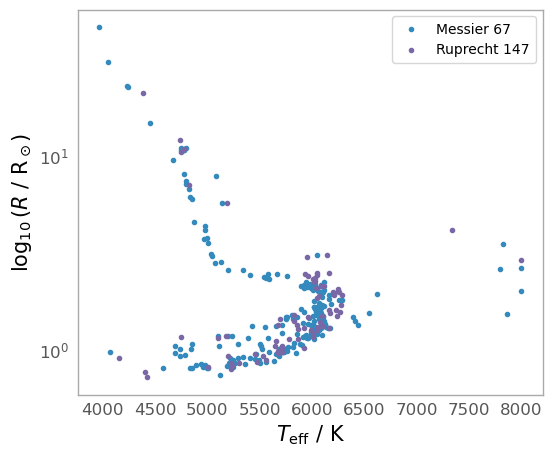

In [205]:
plt.figure(figsize = [6,5])
plt.scatter(GALAH_M67['teff'], GALAH_M67['Radius'], label='Messier 67', marker='.')
plt.scatter(GALAH_R147['teff'], GALAH_R147['Radius'], label='Ruprecht 147', marker='.')
plt.xlabel(r'$T_\mathrm{eff}~/~\mathrm{K}$', fontsize=15)
plt.ylabel(r'$\log_{10} \left( R~/~\mathrm{R_\odot}\right)$', fontsize=15)

plt.yscale('log')  # Set the y-axis to logarithmic scale
plt.legend(fontsize =10)  # Add legend if you have multiple scatter plots
plt.tight_layout
plt.grid(False)
plt.savefig('logR_vs_T.png', dpi=200, bbox_inches="tight")
plt.show()

## Periods

In [172]:
Gaudin_GALAH_M67['Velocity'] = (2 * np.pi * Gaudin_GALAH_M67['Radius']) / Gaudin_GALAH_M67['Per']
Gaudin_GALAH_R147['Velocity'] = (2 * np.pi * Gaudin_GALAH_R147['Radius']) / Gaudin_GALAH_R147['Per']

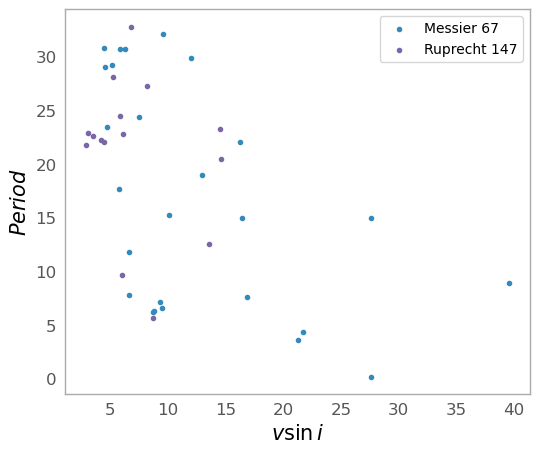

In [204]:
plt.figure(figsize = [6,5])
plt.scatter(Gaudin_GALAH_M67['vsini'], Gaudin_GALAH_M67['Per'], label='Messier 67', marker='.')
plt.scatter(Gaudin_GALAH_R147['vsini'], Gaudin_GALAH_R147['Per'], label='Ruprecht 147', marker='.')

plt.xlabel(r'$v\sin{i}$', fontsize=15)
plt.ylabel(r'$Period$', fontsize=15)

plt.tight_layout
plt.legend(fontsize =10)
plt.grid(False)
plt.savefig('Period_vs_vsini.png', dpi=200, bbox_inches="tight")
plt.show()


In [181]:
Gaudin_GALAH_M67.info()

<Table length=26>
      name       dtype    unit    format     class     n_bad
--------------- ------- -------- -------- ------------ -----
             LC  bytes2             {:>2}       Column     0
           Star   int16             {:3d}       Column     0
         Sample  bytes1             {:>1}       Column     0
        GaiaDR3   int64            {:19d}       Column     0
         _2MASS bytes17            {:>17}       Column     0
           EPIC   int32             {:9d} MaskedColumn    19
            Per float32        d  {:7.4f}       Column     0
          e_Per float32        d  {:7.4f}       Column     0
           Bmag float32      mag  {:6.3f} MaskedColumn     0
         e_Bmag float32      mag  {:6.3f} MaskedColumn    25
           Vmag float32      mag  {:6.3f} MaskedColumn     0
         e_Vmag float32      mag  {:6.3f} MaskedColumn     0
           Rmag float32      mag  {:6.3f} MaskedColumn    21
         e_Rmag float32      mag  {:5.2f} MaskedColumn    25
      